# Running regression on the dataframe we developed from our SQL db

Reference material for the meaning of each column can be found here: https://labrosa.ee.columbia.edu/millionsong/pages/field-list   
Mode: 1 = minor, 0 = major

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #reduce margins in jupyter notebook

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
!ls # what did I call those csv files?

README.md                       images
amazon_ec2_notes.ipynb          million_songs.csv
create_track_metadata_db_new.py regression_on_df.ipynb
data_cleaning.ipynb             scrape_top_100.ipynb
final_ranked_song_db.csv        subset_extraction.ipynb
full_extraction.ipynb           top_single_prediction.key
historical_top_100.csv


In [4]:
million_songs = pd.DataFrame.from_csv('/Users/horisustar/projects/project2backup/final_ranked_song_db.csv',sep=',') #import csv

/Users/horisustar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [15]:
million_songs.head()

,artist_name,rating,title,year,release,duration,artist_familiarity,artist_hotttnesss,key,loudness,mode,song_hotttnesss,tempo,time_signature
0,Mark Dinning,5,Teen Angel,1960,True Rock N Roll 3CD Set,158.95465,0.469933,0.334437,0,-12.697,1,-1.000000,100.699,4
1,Jimmy Jones,8,Handy Man,1960,The Greatest Rock 'n' Roll Hits,123.89832,0.550149,0.346467,10,-12.036,1,-1.000000,143.655,4
2,Chubby Checker,10,The Twist,1960,Hits of The 60's Volume 1,164.36200,0.631271,0.439454,11,-9.814,0,-1.000000,154.208,7
3,Chubby Checker,9,The Twist,1962,Hits of The 60's Volume 1,164.36200,0.631271,0.439454,11,-9.814,0,-1.000000,154.208,7
4,Bobby Rydell,12,Wild One,1960,The Ultimate Sixties Collection,136.88118,0.504600,0.368641,7,-8.317,1,0.731105,151.581,3


In [16]:
million_songs.columns

Index(['artist_name', 'rating', 'title', 'year', 'release', 'duration',
       'artist_familiarity', 'artist_hotttnesss', 'key', 'loudness', 'mode',
       'song_hotttnesss', 'tempo', 'time_signature'],
      dtype='object')

In [17]:
drop_list = ['artist_name', 'title','release'] #get rid of cols we don't need for regression
data = million_songs.drop(drop_list,axis=1)

In [18]:
keys = pd.get_dummies(data['key'], prefix='key', drop_first=True) # create our dummy columns and put them in their own db to append later
modes = pd.get_dummies(data['mode'], prefix='mode', drop_first=True)
time_signatures = pd.get_dummies(data['time_signature'], prefix='time_signature', drop_first=True)
ratings = pd.get_dummies(data['rating'], prefix='rating', drop_first=True)

reg_data = data.drop(['key','time_signature','mode','rating'], axis=1)

In [19]:
reg_data.head()

,year,duration,artist_familiarity,artist_hotttnesss,loudness,song_hotttnesss,tempo
0,1960,158.95465,0.469933,0.334437,-12.697,-1.000000,100.699
1,1960,123.89832,0.550149,0.346467,-12.036,-1.000000,143.655
2,1960,164.36200,0.631271,0.439454,-9.814,-1.000000,154.208
3,1962,164.36200,0.631271,0.439454,-9.814,-1.000000,154.208
4,1960,136.88118,0.504600,0.368641,-8.317,0.731105,151.581


In [24]:
reg_data = pd.concat([data,keys,modes,time_signatures], axis = 1) # add ratings back in potentially #append dbs with keys, modes, time_signatures, ratings
reg_data.head()

,rating,year,duration,artist_familiarity,artist_hotttnesss,key,loudness,mode,song_hotttnesss,tempo,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5,time_signature_7
0,5,1960,158.95465,0.469933,0.334437,0,-12.697,1,-1.000000,100.699,...,0,0,0,0,0,1,0,1,0,0
1,8,1960,123.89832,0.550149,0.346467,10,-12.036,1,-1.000000,143.655,...,0,0,0,1,0,1,0,1,0,0
2,10,1960,164.36200,0.631271,0.439454,11,-9.814,0,-1.000000,154.208,...,0,0,0,0,1,0,0,0,0,1
3,9,1962,164.36200,0.631271,0.439454,11,-9.814,0,-1.000000,154.208,...,0,0,0,0,1,0,0,0,0,1
4,12,1960,136.88118,0.504600,0.368641,7,-8.317,1,0.731105,151.581,...,1,0,0,0,0,1,1,0,0,0


In [11]:
# Plot all of the variable-to-variable relations as scatterplots
# sns.pairplot(reg_data, height=1.2, aspect=1.5)

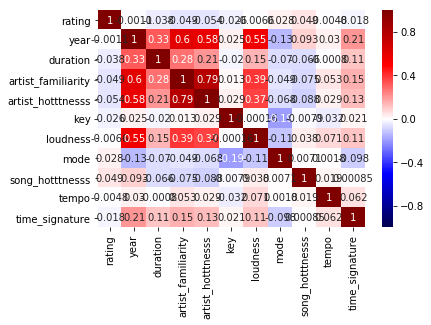

In [12]:
sns.heatmap(data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [29]:
reg_data.columns

Index(['rating', 'year', 'duration', 'artist_familiarity', 'artist_hotttnesss',
       'key', 'loudness', 'mode', 'song_hotttnesss', 'tempo', 'time_signature',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'time_signature_7'],
      dtype='object')

In [31]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ year + artist_familiarity + artist_hotttnesss \
       + loudness + mode + song_hotttnesss + tempo + key_1 + key_2 + key_3 + key_4 \
       + key_5 + key_6 + key_7 + key_8 + key_9 + key_10 + key_11 + mode_1 + time_signature_3 \
       + time_signature_4 + time_signature_5 + time_signature_7', data=reg_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.200
Date:                Thu, 24 Jan 2019   Prob (F-statistic):              0.238
Time:                        17:43:35   Log-Likelihood:                -6909.7
No. Observations:                1450   AIC:                         1.387e+04
Df Residuals:                    1427   BIC:                         1.399e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -132.6336    150.563     -0.881      0.379    -427.982     162.715
year                   0.0978      0.077      1.276      0.202      -0.053       0.248
artist_familiarity    -9.7652     10.123     -0.965      0.335     -29.623      10.093
artist_hotttnesss     -8.1778      9.074     -0.901      0.368     -25.978       9.622
loudness               0.0161      0.266      0.060      0.952      -0.507       0.539
mode                   0.7375      0.877      0.841      0.400      -0.982       2.457
song_hotttnesss        1.4470      0.904      1.600      0.110      -0.327       3.221
tempo                 -0.0014      0.027     -0.051      0.959      -0.054       0.052
key_1                  1.4445      3.364      0.429      0.668      -5.155       8.044
key_2                 -2.9865      3.268     -0.914      0.361      -9.397       3.424
key_3                -10.8382      4.334     -2.500      0.013     -19.341      -2.336
key_4                  0.7545      3.626      0.208      0.835      -6.358       7.867
key_5                  1.6627      3.459      0.481      0.631      -5.122       8.448
key_6                 -0.7229      4.223     -0.171      0.864      -9.006       7.560
key_7                  0.9052      3.210      0.282      0.778      -5.391       7.202
key_8                 -5.7698      3.716     -1.553      0.121     -13.060       1.520
key_9                 -1.3904      3.273     -0.425      0.671      -7.810       5.029
key_10                -0.1095      3.645     -0.030      0.976      -7.259       7.040
key_11                -4.1775      3.435     -1.216      0.224     -10.916       2.561
mode_1                 0.7375      0.877      0.841      0.400      -0.982       2.457
time_signature_3       1.6455      3.880      0.424      0.672      -5.965       9.256
time_signature_4      -0.4863      2.721     -0.179      0.858      -5.824       4.851
time_signature_5      -1.7373      4.459     -0.390      0.697     -10.485       7.010
time_signature_7      -3.6532      7.129     -0.512      0.608     -17.638      10.331
==============================================================================
Omnibus:                      769.469   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.451
Skew:                           0.048   Prob(JB):                     3.39e-18
Kurtosis:                       1.850   Cond. No.                     7.59e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# Create an empty model
lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = reg_data.iloc[:, 1:]

# Choose the response variable(s)
y = reg_data.iloc[:, 0]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.019119517764612515